In [1]:
import wfdb
import wfdb.processing
from pathlib import Path
import numpy as np
import neurokit2 as nk
import pandas as pd

## Calculate the number of each category in the dataset

In [ ]:
df = pd.read_csv('./dataset-2017/REFERENCE.csv', header=None, names=['filename', 'label'])
label_counts = df['label'].value_counts()
print(label_counts)

label
N    5050
O    2456
A     738
~     284
Name: count, dtype: int64


## Find R-peaks in an ECG signal

In [4]:
filename = 'A05960'
rec = wfdb.rdrecord(f'./dataset-2017/{filename}')
sig, fields = wfdb.rdsamp(f'./dataset-2017/{filename}')

# gqrs
gqrs = wfdb.processing.gqrs_detect(sig=sig[:,0], fs=fields['fs'])
gqrs_corrected = wfdb.processing.correct_peaks(
    sig[:,0], gqrs, search_radius=30, smooth_window_size=50, peak_dir="up"
)

# xqrs
conf = wfdb.processing.XQRS.Conf()
xqrs = wfdb.processing.xqrs_detect(sig=sig[:,0], fs=fields['fs'], conf=conf)
xqrs_corrected = wfdb.processing.correct_peaks(
    sig[:,0], xqrs, search_radius=30, smooth_window_size=50, peak_dir="up"
)

# neurokit 
_, rpeaks_neurokit = nk.ecg_peaks(sig[:,0], sampling_rate=fields['fs'], method="neurokit")

# nabian2018
_, rpeaks_nabian2018 = nk.ecg_peaks(sig[:,0], sampling_rate=fields['fs'], method="nabian2018")

# emrich2023
# _, rpeaks_emrich2023 = nk.ecg_peaks(sig[:,0], sampling_rate=fields['fs'], method="emrich2023")

Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.


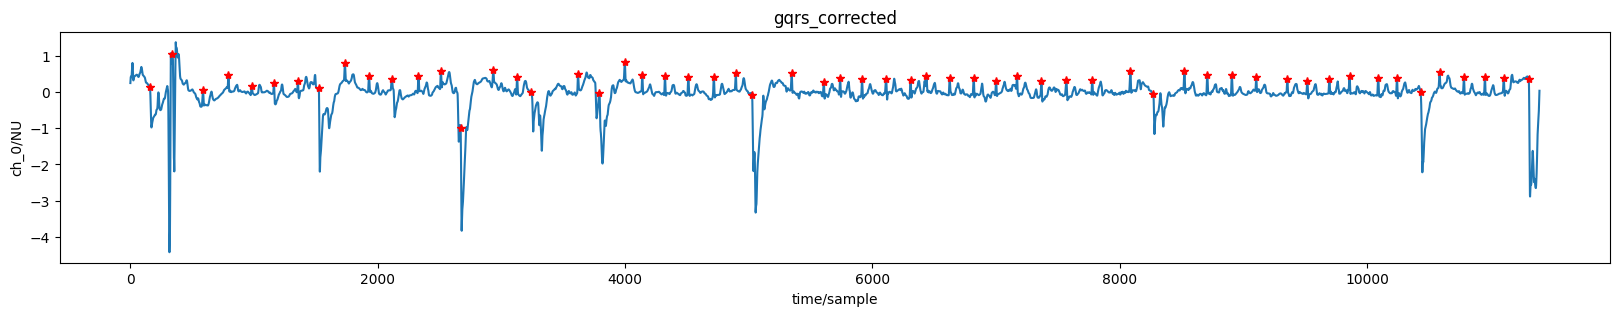

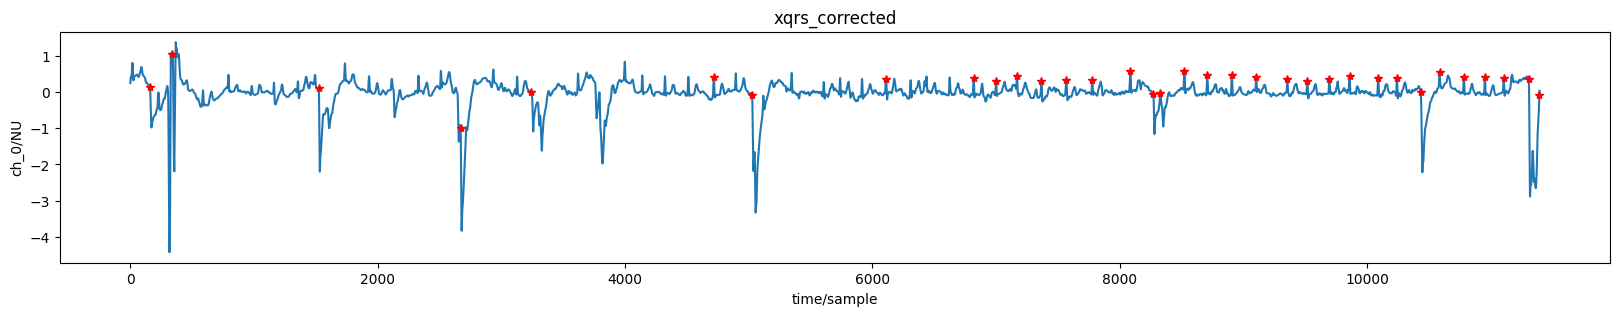

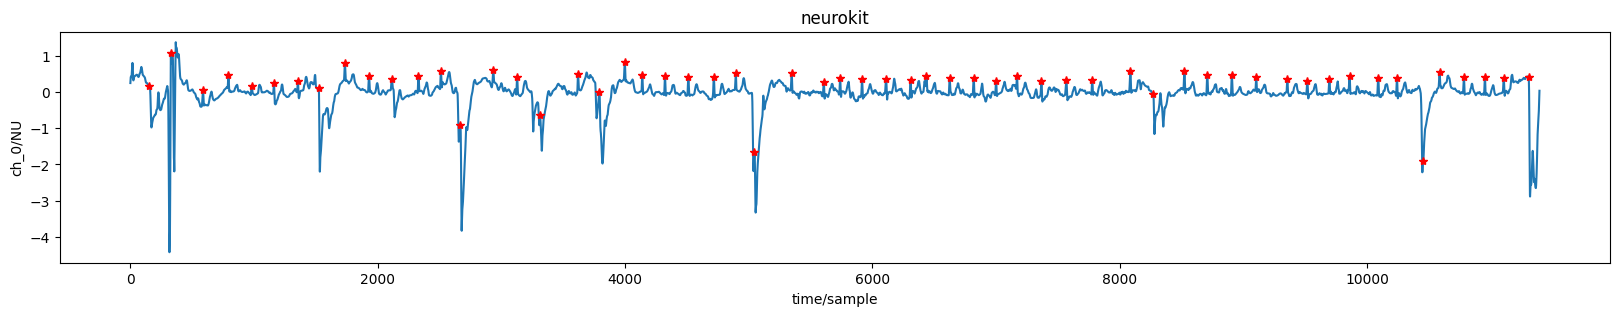

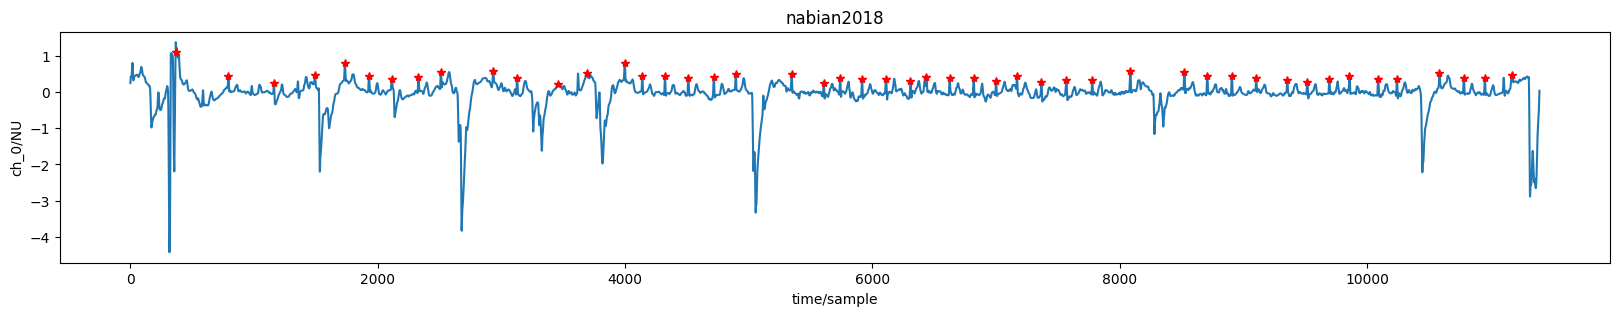

In [5]:
# wfdb.plot_items(signal=sig, title='gqrs',
#                 figsize=(20, 3), ann_samp=[gqrs],)
wfdb.plot_items(signal=sig, title='gqrs_corrected',
                figsize=(20, 3), ann_samp=[gqrs_corrected],)
# wfdb.plot_items(signal=sig, title='xqrs',
#                 figsize=(20, 3), ann_samp=[xqrs],)
wfdb.plot_items(signal=sig, title='xqrs_corrected',
                figsize=(20, 3), ann_samp=[xqrs_corrected],)
wfdb.plot_items(signal=sig, title='neurokit',
                figsize=(20, 3), ann_samp=[rpeaks_neurokit['ECG_R_Peaks']])
wfdb.plot_items(signal=sig, title='nabian2018',
                figsize=(20, 3), ann_samp=[rpeaks_nabian2018['ECG_R_Peaks']])
# wfdb.plot_items(signal=sig, title='emrich2023',
#                 figsize=(20, 3), ann_samp=[rpeaks_emrich2023['ECG_R_Peaks']])

## Segment an ECG signal into single heartbeats

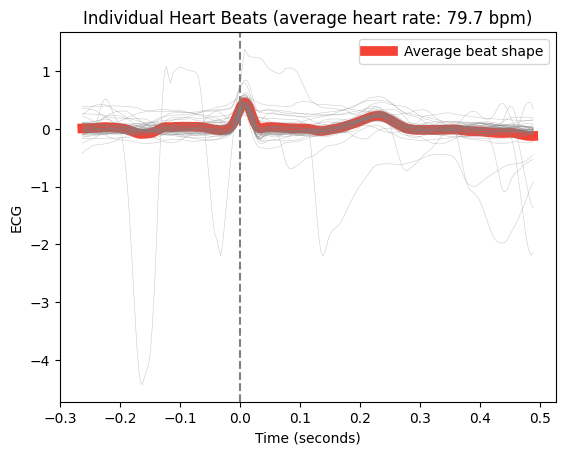

In [6]:
qrs_epochs = nk.ecg_segment(sig[:,0], rpeaks=rpeaks_nabian2018['ECG_R_Peaks'], sampling_rate=fields['fs'], show=True)

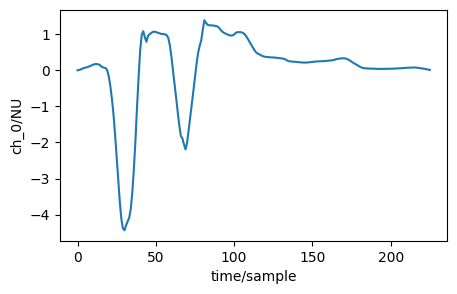

In [8]:
wfdb.plot_items(signal=qrs_epochs['1']['Signal'],figsize=(5, 3))

## msic

In [83]:
PATH = Path("dataset")
record='111'
sampfrom=65000
sampto=70000
signal = wfdb.rdrecord((PATH / record).as_posix(), channels=[0],sampfrom=sampfrom, sampto=sampto + 1).p_signal[:, 0]
annotation = wfdb.rdann((PATH / record).as_posix(), extension="atr", sampfrom=sampfrom, sampto=sampto, shift_samps=True)
r_peaks, labels = annotation.sample, np.array(annotation.symbol)


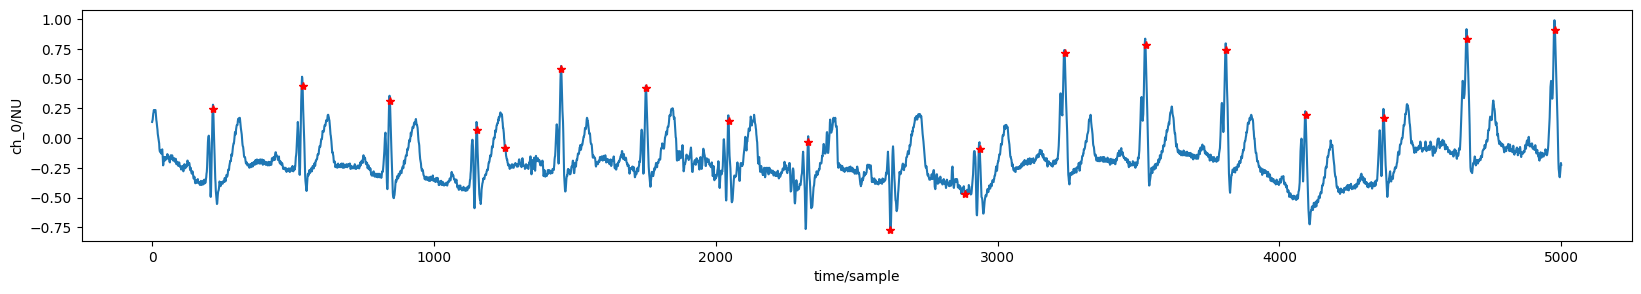

In [84]:
wfdb.plot_items(signal=signal,
                figsize=(20, 3), ann_samp=[r_peaks],)

In [13]:
annotation.__dict__

{'record_name': '100',
 'extension': 'atr',
 'sample': array([    18,     77,    370, ..., 649484, 649734, 649991]),
 'symbol': ['+',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'A',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N'

In [2]:
import pickle

with open('./dataset/mitdb.pkl', 'rb') as f:
  train_data, test_data = pickle.load(f)

In [5]:
train_data[0]

{'record': '101',
 'signal': array([-0.10717475, -0.10717475, -0.10427814, ..., -0.01737969,
        -0.01448307,  0.        ]),
 'r_peaks': array([    82,    396,    711, ..., 649003, 649371, 649750]),
 'categories': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0

In [9]:
import numpy as np
def worker(data):
    # heartbeat segmentation interval

    r_peaks, categories = data["r_peaks"], data["categories"]

    # for remove inter-patient variation
    avg_rri = np.mean(np.diff(r_peaks))

    x1, x2, y, groups = [], [], [], []
    for i in range(len(r_peaks)):
        if i == 0 or i == len(r_peaks) - 1:
            continue

        if categories[i] == 4:  # remove AAMI Q class
            continue

        x2.append([
            r_peaks[i] - r_peaks[i - 1] - avg_rri,  # previous RR Interval
            r_peaks[i + 1] - r_peaks[i] - avg_rri,  # post RR Interval
            (r_peaks[i] - r_peaks[i - 1]) / (r_peaks[i + 1] - r_peaks[i]),  # ratio RR Interval
            np.mean(np.diff(r_peaks[np.maximum(i - 10, 0):i + 1])) - avg_rri  # local RR Interval
        ])
        y.append(categories[i])
        groups.append(data["record"])

    return x2, y, groups

In [10]:
tmp = worker(train_data[0])

In [17]:
tmp[0][0]

[-34.53433476394849,
 -33.53433476394849,
 0.9968253968253968,
 -34.53433476394849]